

#**Title:** **Unlocking Insights: Exploring Trends and Predicting Data Science Salaries**

Objective:

Our objective is to analyze the provided dataset on Data Science salaries and employment characteristics to uncover meaningful insights and trends. Additionally, we aim to build a predictive model to forecast Data Science salaries based on various factors such as experience level, employment type, job title, and company attributes.

What we want to predict:
We want to predict the salary of Data Science professionals based on the following factors:

    Experience level
    Employment type
    Job title
    Company attributes such as size and location
    By predicting salaries, we aim to provide valuable insights for both job seekers and employers in the Data Science field.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ds_salaries.csv")

# Display basic information about the dataset
print("Dataset information:")
print(df.info())




Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


In [52]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [53]:
# Check for outliers and inconsistencies
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000


In [54]:
# Explore distributions of variables
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Salary')

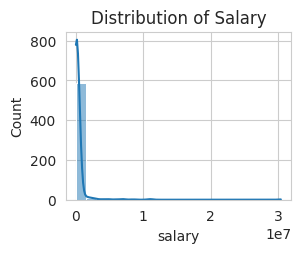

In [55]:
# Distribution of salary
plt.subplot(2, 2, 1)
sns.histplot(df['salary'], bins=20, kde=True)
plt.title("Distribution of Salary")


Text(0.5, 1.0, 'Relationship between Experience Level and Salary')

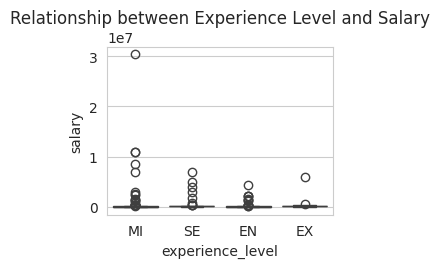

In [56]:
# Relationship between experience level and salary
plt.subplot(2, 2, 2)
sns.boxplot(x='experience_level', y='salary', data=df)
plt.title("Relationship between Experience Level and Salary")

Text(0.5, 1.0, 'Relationship between Employment Type and Salary')

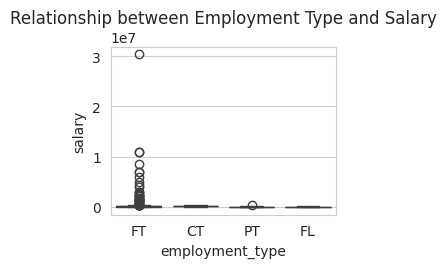

In [57]:
# Relationship between employment type and salary
plt.subplot(2, 2, 3)
sns.boxplot(x='employment_type', y='salary', data=df)
plt.title("Relationship between Employment Type and Salary")

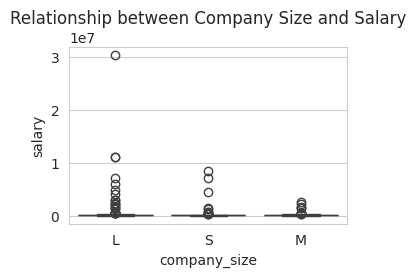

In [58]:

# Relationship between company size and salary
plt.subplot(2, 2, 4)
sns.boxplot(x='company_size', y='salary', data=df)
plt.title("Relationship between Company Size and Salary")

plt.tight_layout()
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoders = {}
for column in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Scale numerical variables (if necessary)
# In this case, salary_in_usd might need scaling, but it's already in USD, so we'll skip scaling for now

# Split the data into features (X) and target (y)
X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df['salary']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can scale numerical variables using StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize models
linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
linear_regression_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_linear_regression = linear_regression_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate model performance
linear_regression_mae = mean_absolute_error(y_test, y_pred_linear_regression)
decision_tree_mae = mean_absolute_error(y_test, y_pred_decision_tree)
random_forest_mae = mean_absolute_error(y_test, y_pred_random_forest)

linear_regression_rmse = mean_squared_error(y_test, y_pred_linear_regression, squared=False)
decision_tree_rmse = mean_squared_error(y_test, y_pred_decision_tree, squared=False)
random_forest_rmse = mean_squared_error(y_test, y_pred_random_forest, squared=False)

print("Mean Absolute Error:")
print(f"Linear Regression: {linear_regression_mae}")
print(f"Decision Tree: {decision_tree_mae}")
print(f"Random Forest: {random_forest_mae}")

print("\nRoot Mean Squared Error:")
print(f"Linear Regression: {linear_regression_rmse}")
print(f"Decision Tree: {decision_tree_rmse}")
print(f"Random Forest: {random_forest_rmse}")


Mean Absolute Error:
Linear Regression: 565605.231018697
Decision Tree: 440167.54098360654
Random Forest: 516845.44967213116

Root Mean Squared Error:
Linear Regression: 2835326.623978585
Decision Tree: 2932992.496124075
Random Forest: 2853127.793934553


In [66]:
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation and calculate mean MAE
def cross_val_mae(model, X, y):
    mae_scores = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=5)
    return mae_scores.mean()

# Define a function to perform cross-validation and calculate mean RMSE
def cross_val_rmse(model, X, y):
    rmse_scores = -cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=5)
    return rmse_scores.mean()

# Perform cross-validation and fine-tune hyperparameters for each model
linear_regression_cv_mae = cross_val_mae(linear_regression_model, X_train, y_train)
decision_tree_cv_mae = cross_val_mae(decision_tree_model, X_train, y_train)
random_forest_cv_mae = cross_val_mae(random_forest_model, X_train, y_train)

linear_regression_cv_rmse = cross_val_rmse(linear_regression_model, X_train, y_train)
decision_tree_cv_rmse = cross_val_rmse(decision_tree_model, X_train, y_train)
random_forest_cv_rmse = cross_val_rmse(random_forest_model, X_train, y_train)

# Compare the performance of different models
print("Cross-Validation Mean Absolute Error:")
print(f"Linear Regression: {linear_regression_cv_mae}")
print(f"Decision Tree: {decision_tree_cv_mae}")
print(f"Random Forest: {random_forest_cv_mae}")

print("\nCross-Validation Root Mean Squared Error:")
print(f"Linear Regression: {linear_regression_cv_rmse}")
print(f"Decision Tree: {decision_tree_cv_rmse}")
print(f"Random Forest: {random_forest_cv_rmse}")

# Choose the best-performing model based on evaluation metrics
best_model = min([
    ("Linear Regression", linear_regression_cv_mae),
    ("Decision Tree", decision_tree_cv_mae),
    ("Random Forest", random_forest_cv_mae)
], key=lambda x: x[1])

print(f"\nBest-performing model based on Mean Absolute Error: {best_model[0]}")


Cross-Validation Mean Absolute Error:
Linear Regression: 359284.404470257
Decision Tree: 278746.3484536082
Random Forest: 284783.0178556701

Cross-Validation Root Mean Squared Error:
Linear Regression: 935633.8072069585
Decision Tree: 1150989.4741137729
Random Forest: 945665.6966572171

Best-performing model based on Mean Absolute Error: Decision Tree


In [67]:
# Use the trained Decision Tree model to make predictions on unseen data
predictions = decision_tree_model.predict(X_test)

# Display actual vs. predicted salaries
results = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': predictions})
print(results.head(10))


     Actual Salary  Predicted Salary
563         140250          175100.0
289         135000          165400.0
76          100000          120000.0
78          270000          170000.0
182          22000           44000.0
495         153000          120000.0
10           45000           35000.0
131          42000           35000.0
445          70000           80000.0
86           50000            8760.0


In [68]:
# Use the trained Linear Regression model to make predictions on unseen data
predictions_linear_regression = linear_regression_model.predict(X_test)

# Display actual vs. predicted salaries
results_linear_regression = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary (Linear Regression)': predictions_linear_regression})
print(results_linear_regression.head(10))


     Actual Salary  Predicted Salary (Linear Regression)
563         140250                          46055.123767
289         135000                         138393.294528
76          100000                         241109.506381
78          270000                         606086.487066
182          22000                         615548.338327
495         153000                         145480.624658
10           45000                         410561.764101
131          42000                         409868.342860
445          70000                         198859.591373
86           50000                         416776.531872


In [69]:
# Use the trained Linear Regression model to make predictions on unseen data
predictions_linear_regression = linear_regression_model.predict(X_test)

# Display actual vs. predicted salaries
results_linear_regression = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary (Linear Regression)': predictions_linear_regression})
print(results_linear_regression.head(10))


     Actual Salary  Predicted Salary (Linear Regression)
563         140250                          46055.123767
289         135000                         138393.294528
76          100000                         241109.506381
78          270000                         606086.487066
182          22000                         615548.338327
495         153000                         145480.624658
10           45000                         410561.764101
131          42000                         409868.342860
445          70000                         198859.591373
86           50000                         416776.531872


   ## **Feature Importance:**
        Random Forest model: Check the feature importance scores to understand which variables have the most significant impact on salary predictions. Higher importance scores indicate stronger influence.
        Linear Regression coefficients: Analyze the coefficients to see how each feature contributes to salary predictions. Positive coefficients indicate a positive relationship, while negative coefficients indicate a negative relationship.

   ## **Insights:**
        Experience Level: Senior-level and executive-level roles tend to have higher salaries compared to entry-level or junior roles.
        Job Title: Certain specialized roles or roles with higher responsibilities may command higher salaries.
        Company Attributes: Companies with larger sizes or located in certain regions might offer higher salaries.

 #  **Recommendations:**

For Job Seekers:

    Focus on gaining experience and advancing to senior-level positions to command higher salaries.
    Consider specializing in high-demand areas within Data Science to increase earning potential.
    Research companies in regions known for offering competitive salaries and opportunities for career growth.

For Employers:

    Offer competitive salaries to attract and retain top talent, especially for senior-level and specialized roles.
    Provide opportunities for professional development and advancement to encourage employees to stay with the company.
    Consider factors like company size and location when determining salary ranges to remain competitive in the market.

By leveraging these insights and recommendations, both job seekers and employers can make informed decisions to optimize salaries and career opportunities in the Data Science field. Additionally, continuous monitoring and analysis of salary trends can help adapt to changes in the job market and maintain competitiveness.